In [ ]:
# Import Library
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from difflib import get_close_matches

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"hafizhanurulqolby","key":"f42a992f6133036a0659d5d7fa222a7b"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download Dataset from Kaggle
!kaggle datasets download -d zygmunt/goodbooks-10k
!unzip goodbooks-10k.zip

Dataset URL: https://www.kaggle.com/datasets/zygmunt/goodbooks-10k
License(s): CC-BY-SA-4.0
goodbooks-10k.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  goodbooks-10k.zip
replace book_tags.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Load Data
books = pd.read_csv("books.csv")
book_tags = pd.read_csv("book_tags.csv")
tags = pd.read_csv("tags.csv")

In [ ]:
# Print dataset dimensions
print("books.csv:", books.shape)
print("book_tags.csv:", book_tags.shape)
print("tags.csv:", tags.shape)

books.csv: (10000, 23)
book_tags.csv: (999912, 3)
tags.csv: (34252, 2)


In [ ]:
# Show all features in books.csv
print("\n📌 List of Features in books.csv:")
print(books.columns.tolist())


📌 List of Features in books.csv:
['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year', 'original_title', 'title', 'language_code', 'average_rating', 'ratings_count', 'work_ratings_count', 'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url', 'small_image_url']


In [ ]:
# Show data types and non-null counts
print("\nℹ️ Data Info:")
books.info()


ℹ️ Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000

In [ ]:
# Show missing values per column
print("\n🔍 Missing Values Summary:")
print(books.isnull().sum())


🔍 Missing Values Summary:
id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64


In [ ]:
# Show first few rows (include all main features)
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


**Exploratory Data Analysis (EDA)**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Average Rating')

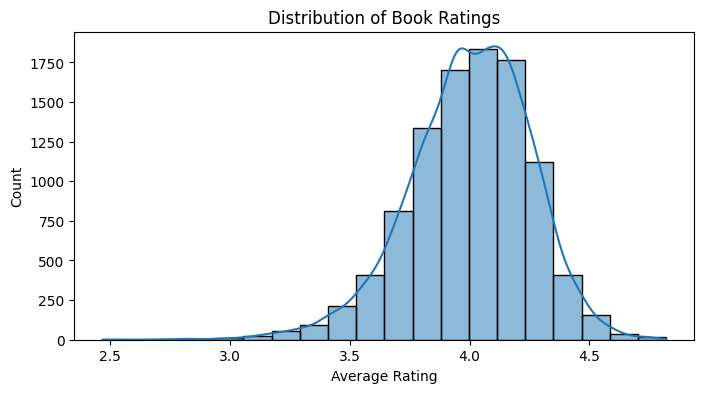

In [ ]:
# Rating distribution
plt.figure(figsize=(8,4))
sns.histplot(books['average_rating'], bins=20, kde=True)
plt.title('Distribution of Book Ratings')
plt.xlabel('Average Rating')

Histogram menunjukkan bahwa sebagian besar buku memiliki rata-rata rating antara 3,5 hingga 4,3, dengan puncaknya di sekitar 4,0. Distribusinya mendekati normal dengan sedikit skew ke kanan, yang mengindikasikan bahwa rating tinggi cukup umum, sementara rating yang sangat rendah atau sangat tinggi jarang terjadi. Hal ini mendukung penggunaan nilai 4,0 sebagai ambang relevansi dalam mengevaluasi kinerja rekomendasi (misalnya, untuk Precision@K).

Text(0.5, 0, 'Number of Books')

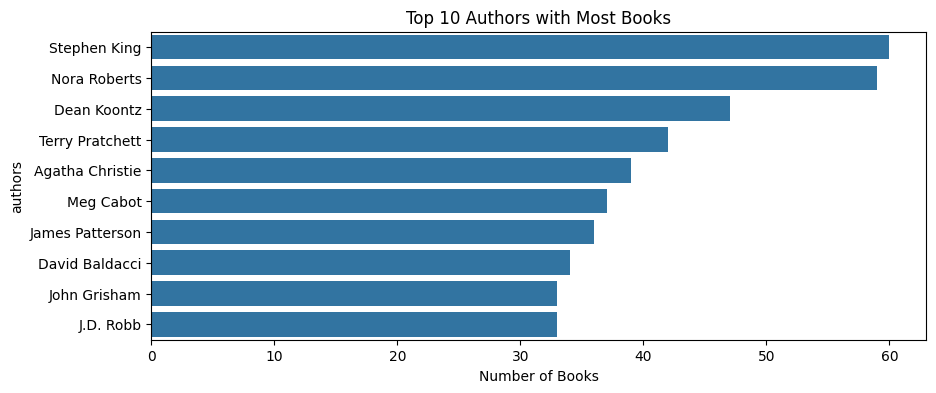

In [ ]:
# Top 10 Authors with Most Books
top_authors = books['authors'].value_counts().head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.title('Top 10 Authors with Most Books')
plt.xlabel('Number of Books')

Dataset ini menunjukkan bahwa Stephen King adalah penulis dengan jumlah buku terbanyak (60 buku), Nora Roberts (50 buku), Dean Koontz (40 buku) dan penulis terkenal lainnya termasuk Agatha Christie dan James Patterson.

**Data Preparation**

In [ ]:
# Merge tag names into book_tags
book_tags = book_tags.merge(tags, on='tag_id')

Langkah ini menggabungkan data `book_tags` dengan tabel `tags` untuk memperoleh nama tag yang lebih informatif.

In [ ]:
# Remove duplicates and keep most relevant tags (e.g., top 10 per book)
top_tags = book_tags.groupby('goodreads_book_id').apply(
    lambda x: x.sort_values('count', ascending=False).head(10)
).reset_index(drop=True)

<ipython-input-29-7bf7aeed0448>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_tags = book_tags.groupby('goodreads_book_id').apply(


Untuk setiap buku, hanya disimpan 10 tag paling sering digunakan. Ini dilakukan untuk menghindari terlalu banyak tag yang kurang relevan.

In [ ]:
# Create combined tag string per book
book_tags_agg = top_tags.groupby('goodreads_book_id')['tag_name'].apply(lambda x: ' '.join(x)).reset_index()
book_tags_agg.columns = ['book_id', 'tags']

Menggabungkan semua tag populer menjadi satu string per buku agar dapat digunakan sebagai fitur konten.

In [ ]:
# Merge back to books
books = books.merge(book_tags_agg, left_on='book_id', right_on='book_id', how='left')
books['tags'] = books['tags'].fillna('')

In [ ]:
# Create content feature using title, authors, and tags
books['content'] = books['title'] + ' ' + books['authors'] + ' ' + books['tags']

Menggabungkan informasi tag ke data buku dan membuat kolom `content` berisi kombinasi dari judul, penulis, dan tag. Ini adalah fitur utama yang akan digunakan dalam sistem rekomendasi.

In [ ]:
# Vectorize 'content' column
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(books['content'])

Kolom `content` yang berisi teks kemudian diubah menjadi representasi numerik menggunakan TF-IDF. Ini adalah tahap akhir dari data preparation sebelum masuk ke tahap modeling.

**Modelling (Content-based Filtering)**

In [ ]:
# Cosine similarity digunakan untuk mengukur tingkat kemiripan antara buku berdasarkan vektor TF-IDF dari konten mereka.
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Fungsi recommend() mencari buku paling mirip dengan input judul berdasarkan cosine similarity, dan mengembalikan 5 rekomendasi buku.
def recommend(title_partial, df=books, similarity=cosine_sim, top_n=5):
    all_titles = df['title'].tolist()
    close_matches = get_close_matches(title_partial, all_titles, n=1, cutoff=0.5)
    if not close_matches:
        return f"No close match found for '{title_partial}'."

    title = close_matches[0]
    idx = df[df['title'] == title].index[0]
    sim_scores = list(enumerate(similarity[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    book_indices = [i[0] for i in sim_scores]
    return df.iloc[book_indices][['title', 'authors', 'average_rating']]

In [ ]:
# Menguji fungsi rekomendasi dengan input judul "Hunger Games" untuk melihat hasil Top-5 rekomendasi buku.
recommend("Hunger Games")

,title,authors,average_rating
9641,Keep the Aspidistra Flying,George Orwell,3.87
6223,The World of the Hunger Games (Hunger Games Tr...,Kate Egan,4.48
2354,Silas Marner,George Eliot,3.60
8564,Nostromo,Joseph Conrad,3.81
2951,The Mill on the Floss,"George Eliot, A.S. Byatt",3.77


**Evaluation**

In [ ]:
# Evaluation with Precision@K

# 1. Buat list buku relevan
relevant_books = set(books[books['average_rating'] >= 4.0]['title'])

# 2. Hitung Precision@5 untuk satu judul input
def evaluate_precision_at_k(title_input, k=5):
    recommendations = recommend(title_input)
    if isinstance(recommendations, str):  # handle error message
        return recommendations

    recommended_titles = recommendations['title'].values
    relevant_recommended = [title for title in recommended_titles if title in relevant_books]

    precision = len(relevant_recommended) / k
    return f"Precision@{k} for '{title_input}': {precision:.2f}"

Menggunakan metrik *Precision@K* untuk mengevaluasi seberapa relevan rekomendasi yang dihasilkan. Buku dianggap relevan jika memiliki rating ≥ 4.0. Precision dihitung sebagai proporsi buku relevan di antara rekomendasi yang diberikan.

In [ ]:
evaluate_precision_at_k("Hunger Games")

"Precision@5 for 'Hunger Games': 0.20"

Menghitung precision@5 untuk buku "Hunger Games" untuk mengetahui seberapa akurat rekomendasi dari model.